Scraping McDonalds' Menu

In [6]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import os

# Set output directory
output_dir = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data"
os.makedirs(output_dir, exist_ok=True)

# Unique file paths
mcd_source_path = os.path.join(output_dir, 'mcdonalds_page_source.html')
mcd_csv_path = os.path.join(output_dir, 'mcdonalds_nutrition.csv')

# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

service = Service()
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    url = "https://www.nutritionix.com/mcdonalds/menu/premium"
    driver.get(url)
    time.sleep(3)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Save page source
    with open(mcd_source_path, 'w', encoding='utf-8') as f:
        f.write(soup.prettify())
    print(f"Saved page source to: {mcd_source_path}")

    menu_data = []

    # Find nutrition table
    table = soup.find('table', class_='tblCompare')
    if not table:
        raise Exception("Nutrition table not found")

    rows = table.find_all('tr', class_=['odd', 'even'])

    for row in rows:
        name_cell = row.find('td', class_='al')
        if not name_cell:
            continue
        name_link = name_cell.find('a', class_='nmItem')
        item_name = name_link.text.strip() if name_link else "Unknown"

        nutrition_cells = row.find_all('td', class_='col')
        if len(nutrition_cells) < 10:
            continue

        menu_data.append({
            'Item': item_name,
            'Calories': nutrition_cells[0].text.strip(),
            'Total Fat (g)': nutrition_cells[1].text.strip(),
            'Saturated Fat (g)': nutrition_cells[2].text.strip(),
            'Trans Fat (g)': nutrition_cells[3].text.strip(),
            'Cholesterol (mg)': nutrition_cells[4].text.strip(),
            'Sodium (mg)': nutrition_cells[5].text.strip().replace(',', ''),
            'Total Carbohydrates (g)': nutrition_cells[6].text.strip(),
            'Dietary Fiber (g)': nutrition_cells[7].text.strip(),
            'Sugars (g)': nutrition_cells[8].text.strip(),
            'Protein (g)': nutrition_cells[9].text.strip()
        })

    df = pd.DataFrame(menu_data)
    df.to_csv(mcd_csv_path, index=False)
    print(f" Successfully saved {len(df)} items to: {mcd_csv_path}")

except Exception as e:
    print(f"\n Error: {e}")
    screenshot_path = os.path.join(output_dir, 'mcdonalds_error_screenshot.png')
    driver.save_screenshot(screenshot_path)
    print(f"Screenshot saved to: {screenshot_path}")
    print(f"Page source saved to: {mcd_source_path}")

finally:
    driver.quit()

Saved page source to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\mcdonalds_page_source.html
 Successfully saved 193 items to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\mcdonalds_nutrition.csv


Scraping Chick Fil A menu

In [7]:
# Configure Chrome options
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Uncomment when done testing
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

service = Service()
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    cfa_url = "https://www.nutritionix.com/chick-fil-a/menu/premium?desktop"
    driver.get(cfa_url)
    
    time.sleep(3)  # Let JavaScript render

    # Parse the page source
    cfa_soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Save HTML locally
    cfa_source_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\cfa_page_source.html"
    with open(cfa_source_path, 'w', encoding='utf-8') as f:
        f.write(cfa_soup.prettify())
    print(f"Saved page source to: {cfa_source_path}")
    
    cfa_menu_data = []

    # Locate the nutrition table
    cfa_table = cfa_soup.find('table', class_='tblCompare')
    if not cfa_table:
        raise Exception("Chick-fil-A nutrition table not found")

    cfa_rows = cfa_table.find_all('tr', class_=['odd', 'even'])

    for row in cfa_rows:
        name_cell = row.find('td', class_='al')
        if not name_cell:
            continue

        name_link = name_cell.find('a', class_='nmItem')
        cfa_item_name = name_link.text.strip() if name_link else "Unknown"

        cfa_nutrition_cells = row.find_all('td', class_='col')
        if len(cfa_nutrition_cells) < 10:
            continue

        cfa_menu_data.append({
            'Item': cfa_item_name,
            'Calories': cfa_nutrition_cells[0].text.strip(),
            'Total Fat (g)': cfa_nutrition_cells[1].text.strip(),
            'Saturated Fat (g)': cfa_nutrition_cells[2].text.strip(),
            'Trans Fat (g)': cfa_nutrition_cells[3].text.strip(),
            'Cholesterol (mg)': cfa_nutrition_cells[4].text.strip(),
            'Sodium (mg)': cfa_nutrition_cells[5].text.strip().replace(',', ''),
            'Total Carbohydrates (g)': cfa_nutrition_cells[6].text.strip(),
            'Dietary Fiber (g)': cfa_nutrition_cells[7].text.strip(),
            'Sugars (g)': cfa_nutrition_cells[8].text.strip(),
            'Protein (g)': cfa_nutrition_cells[9].text.strip()
        })

    if not cfa_menu_data:
        raise Exception(f"No Chick-fil-A menu items found. Check the page source: {cfa_source_path}")

    cfa_df = pd.DataFrame(cfa_menu_data)
    print("\nFirst 5 Chick-fil-A items:")
    print(cfa_df.head())

    # Save the dataframe to your project directory
    cfa_csv_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\chick_fil_a_nutrition.csv"
    cfa_df.to_csv(cfa_csv_path, index=False)
    print(f"\nSuccessfully saved {len(cfa_df)} items to: {cfa_csv_path}")

except Exception as e:
    print(f"\nError: {e}")
    cfa_screenshot_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\cfa_error_screenshot.png"
    driver.save_screenshot(cfa_screenshot_path)
    print(f"Screenshot saved to: {cfa_screenshot_path}")
    print(f"Page source saved to: {cfa_source_path}")

finally:
    driver.quit()


Saved page source to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\cfa_page_source.html

First 5 Chick-fil-A items:
                               Item Calories Total Fat (g) Saturated Fat (g)  \
0       Bacon, Egg & Cheese Biscuit      420            23                11   
1        Bacon, Egg & Cheese Muffin      300            13                 6   
2  Berry Parfait with Cookie Crumbs      240             8               3.5   
3        Berry Parfait with Granola      270             9               3.5   
4                   Buttery Biscuit      290            15                 6   

  Trans Fat (g) Cholesterol (mg) Sodium (mg) Total Carbohydrates (g)  \
0             0              180        1220                      38   
1             0              180         780                      28   
2             0               20          85                      31   
3             0               20          85                      35   
4             0                

Scraping Burger King Menu

In [8]:
# Configure Chrome options
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Uncomment when done testing
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

service = Service()
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    bk_url = "https://www.nutritionix.com/burger-king/menu/premium?desktop"
    driver.get(bk_url)
    
    time.sleep(3)  # Let JavaScript render

    # Parse the page source
    bk_soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Save HTML locally
    bk_source_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\bk_page_source.html"
    with open(bk_source_path, 'w', encoding='utf-8') as f:
        f.write(bk_soup.prettify())
    print(f"Saved page source to: {bk_source_path}")
    
    bk_menu_data = []

    # Locate the nutrition table
    bk_table = bk_soup.find('table', class_='tblCompare')
    if not bk_table:
        raise Exception("Burger King nutrition table not found")

    bk_rows = bk_table.find_all('tr', class_=['odd', 'even'])

    for row in bk_rows:
        name_cell = row.find('td', class_='al')
        if not name_cell:
            continue

        name_link = name_cell.find('a', class_='nmItem')
        bk_item_name = name_link.text.strip() if name_link else "Unknown"

        bk_nutrition_cells = row.find_all('td', class_='col')
        if len(bk_nutrition_cells) < 10:
            continue

        bk_menu_data.append({
            'Item': bk_item_name,
            'Calories': bk_nutrition_cells[0].text.strip(),
            'Total Fat (g)': bk_nutrition_cells[1].text.strip(),
            'Saturated Fat (g)': bk_nutrition_cells[2].text.strip(),
            'Trans Fat (g)': bk_nutrition_cells[3].text.strip(),
            'Cholesterol (mg)': bk_nutrition_cells[4].text.strip(),
            'Sodium (mg)': bk_nutrition_cells[5].text.strip().replace(',', ''),
            'Total Carbohydrates (g)': bk_nutrition_cells[6].text.strip(),
            'Dietary Fiber (g)': bk_nutrition_cells[7].text.strip(),
            'Sugars (g)': bk_nutrition_cells[8].text.strip(),
            'Protein (g)': bk_nutrition_cells[9].text.strip()
        })

    if not bk_menu_data:
        raise Exception(f"No Burger King menu items found. Check the page source: {bk_source_path}")

    bk_df = pd.DataFrame(bk_menu_data)
    print("\nFirst 5 Burger King items:")
    print(bk_df.head())

    # Save the dataframe to your project directory
    bk_csv_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\burger_king_nutrition.csv"
    bk_df.to_csv(bk_csv_path, index=False)
    print(f"\nSuccessfully saved {len(bk_df)} items to: {bk_csv_path}")

except Exception as e:
    print(f"\nError: {e}")
    bk_screenshot_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\bk_error_screenshot.png"
    driver.save_screenshot(bk_screenshot_path)
    print(f"Screenshot saved to: {bk_screenshot_path}")
    print(f"Page source saved to: {bk_source_path}")

finally:
    driver.quit()


Saved page source to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\bk_page_source.html

First 5 Burger King items:
                                    Item Calories Total Fat (g)  \
0            3 Piece French Toast Sticks      350            12   
1            5 Piece French Toast Sticks      520            19   
2           Bacon, Egg, & Cheese Biscuit      450            30   
3     Bacon, Egg, & Cheese Croissan'wich      410            25   
4  Bacon, Sausage, Egg, & Cheese Biscuit      710            53   

  Saturated Fat (g) Trans Fat (g) Cholesterol (mg) Sodium (mg)  \
0                 2             0                0         220   
1                 4             0                0         350   
2                14             1              235        1580   
3                12             1              260        1030   
4                24             1              290        2390   

  Total Carbohydrates (g) Dietary Fiber (g) Sugars (g) Protein (g)  
0   

Scraping KFC menu

In [9]:
# Configure Chrome options
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Uncomment for headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

service = Service()
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    kfc_url = "https://www.nutritionix.com/kfc/menu/premium?desktop"
    driver.get(kfc_url)
    
    time.sleep(3)  # Wait for JavaScript content to load

    kfc_soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Save HTML page source
    kfc_source_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\kfc_page_source.html"
    with open(kfc_source_path, 'w', encoding='utf-8') as f:
        f.write(kfc_soup.prettify())
    print(f"Saved page source to: {kfc_source_path}")
    
    kfc_menu_data = []

    kfc_table = kfc_soup.find('table', class_='tblCompare')
    if not kfc_table:
        raise Exception("KFC nutrition table not found")

    kfc_rows = kfc_table.find_all('tr', class_=['odd', 'even'])

    for row in kfc_rows:
        name_cell = row.find('td', class_='al')
        if not name_cell:
            continue

        name_link = name_cell.find('a', class_='nmItem')
        kfc_item_name = name_link.text.strip() if name_link else "Unknown"

        kfc_nutrition_cells = row.find_all('td', class_='col')
        if len(kfc_nutrition_cells) < 10:
            continue

        kfc_menu_data.append({
            'Item': kfc_item_name,
            'Calories': kfc_nutrition_cells[0].text.strip(),
            'Total Fat (g)': kfc_nutrition_cells[1].text.strip(),
            'Saturated Fat (g)': kfc_nutrition_cells[2].text.strip(),
            'Trans Fat (g)': kfc_nutrition_cells[3].text.strip(),
            'Cholesterol (mg)': kfc_nutrition_cells[4].text.strip(),
            'Sodium (mg)': kfc_nutrition_cells[5].text.strip().replace(',', ''),
            'Total Carbohydrates (g)': kfc_nutrition_cells[6].text.strip(),
            'Dietary Fiber (g)': kfc_nutrition_cells[7].text.strip(),
            'Sugars (g)': kfc_nutrition_cells[8].text.strip(),
            'Protein (g)': kfc_nutrition_cells[9].text.strip()
        })

    if not kfc_menu_data:
        raise Exception(f"No KFC menu items found. Check the page source: {kfc_source_path}")

    kfc_df = pd.DataFrame(kfc_menu_data)
    print("\nFirst 5 KFC items:")
    print(kfc_df.head())

    # Save as CSV
    kfc_csv_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\kfc_nutrition.csv"
    kfc_df.to_csv(kfc_csv_path, index=False)
    print(f"\nSuccessfully saved {len(kfc_df)} items to: {kfc_csv_path}")

except Exception as e:
    print(f"\nError: {e}")
    kfc_screenshot_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\kfc_error_screenshot.png"
    driver.save_screenshot(kfc_screenshot_path)
    print(f"Screenshot saved to: {kfc_screenshot_path}")
    print(f"Page source saved to: {kfc_source_path}")

finally:
    driver.quit()


Saved page source to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\kfc_page_source.html

First 5 KFC items:
                                    Item Calories Total Fat (g)  \
0                      Apple Pie Poppers       80             5   
1                     Cherry Pie Poppers       70           4.5   
2  KFC Chicken Sandwich - Chipotle Ranch      670            38   
3       KFC Chicken Sandwich - Honey BBQ      600            26   
4    KFC Chicken Sandwich - Honey Garlic      610            26   

  Saturated Fat (g) Trans Fat (g) Cholesterol (mg) Sodium (mg)  \
0               1.5             0                0          55   
1                 0             0                0          40   
2                 5             0               90        1330   
3                 3             0               80        1330   
4                 3             0               80        1370   

  Total Carbohydrates (g) Dietary Fiber (g) Sugars (g) Protein (g)  
0          

Scraping SubWay menu

In [10]:
# Configure Chrome options
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Enable this after testing
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

service = Service()
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    subway_url = "https://www.nutritionix.com/subway/menu/premium?desktop"
    driver.get(subway_url)
    
    time.sleep(3)  # Allow JavaScript to load
    
    subway_soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Save HTML page source
    subway_source_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\subway_page_source.html"
    with open(subway_source_path, 'w', encoding='utf-8') as f:
        f.write(subway_soup.prettify())
    print(f"Saved page source to: {subway_source_path}")
    
    subway_menu_data = []

    subway_table = subway_soup.find('table', class_='tblCompare')
    if not subway_table:
        raise Exception("Subway nutrition table not found")

    subway_rows = subway_table.find_all('tr', class_=['odd', 'even'])

    for row in subway_rows:
        name_cell = row.find('td', class_='al')
        if not name_cell:
            continue

        name_link = name_cell.find('a', class_='nmItem')
        subway_item_name = name_link.text.strip() if name_link else "Unknown"

        subway_nutrition_cells = row.find_all('td', class_='col')
        if len(subway_nutrition_cells) < 10:
            continue

        subway_menu_data.append({
            'Item': subway_item_name,
            'Calories': subway_nutrition_cells[0].text.strip(),
            'Total Fat (g)': subway_nutrition_cells[1].text.strip(),
            'Saturated Fat (g)': subway_nutrition_cells[2].text.strip(),
            'Trans Fat (g)': subway_nutrition_cells[3].text.strip(),
            'Cholesterol (mg)': subway_nutrition_cells[4].text.strip(),
            'Sodium (mg)': subway_nutrition_cells[5].text.strip().replace(',', ''),
            'Total Carbohydrates (g)': subway_nutrition_cells[6].text.strip(),
            'Dietary Fiber (g)': subway_nutrition_cells[7].text.strip(),
            'Sugars (g)': subway_nutrition_cells[8].text.strip(),
            'Protein (g)': subway_nutrition_cells[9].text.strip()
        })

    if not subway_menu_data:
        raise Exception(f"No Subway menu items found. Check the page source: {subway_source_path}")

    subway_df = pd.DataFrame(subway_menu_data)
    print("\nFirst 5 Subway items:")
    print(subway_df.head())

    # Save to CSV
    subway_csv_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\subway_nutrition.csv"
    subway_df.to_csv(subway_csv_path, index=False)
    print(f"\nSuccessfully saved {len(subway_df)} items to: {subway_csv_path}")

except Exception as e:
    print(f"\nError: {e}")
    subway_screenshot_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\subway_error_screenshot.png"
    driver.save_screenshot(subway_screenshot_path)
    print(f"Screenshot saved to: {subway_screenshot_path}")
    print(f"Page source saved to: {subway_source_path}")

finally:
    driver.quit()


Saved page source to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\subway_page_source.html

First 5 Subway items:
                       Item Calories Total Fat (g) Saturated Fat (g)  \
0          6" #1 The Philly      510             0                25   
1          6" #2 The Outlaw      490             0                22   
2            6" #6 The Boss      690             0                38   
3  6" #10 All-American Club      540             0                28   
4        6" #11 Subway Club      500             0                24   

  Trans Fat (g) Cholesterol (mg) Sodium (mg) Total Carbohydrates (g)  \
0             9                1          85                   1,320   
1             9                1          90                   1,440   
2            16                1          85                   1,860   
3            10                1          75                   1,520   
4             8                1          75                   1,520   

  Dietar

Categorising menu items

In [34]:
# Path to data folder
data_dir = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data"

# List of CSV files and their corresponding chain names
chain_files = {
    "chick_fil_a_nutrition.csv": "Chick-fil-A",
    "burger_king_nutrition.csv": "Burger King",
    "kfc_nutrition.csv": "KFC",
    "subway_nutrition.csv": "Subway",
    "mcdonalds_nutrition.csv": "McDonald's"  # Assuming this was converted from PDF earlier
}

# Function to categorize items based on their name
def categorize_item(item):
    item = item.lower()
    if 'chicken' in item:
        return 'Chicken'
    elif 'burger' in item:
        return 'Burger'
    elif 'fish' in item:
        return 'Fish'
    elif 'salad' in item:
        return 'Salad'
    elif 'wrap' in item:
        return 'Wrap'
    elif 'sub' in item or 'sandwich' in item:
        return 'Sandwich'
    elif 'side' in item or 'fries' in item:
        return 'Side'
    elif 'drink' in item or 'beverage' in item:
        return 'Drink'
    else:
        return 'Other'

# Combine data
combined_df = pd.DataFrame()

for file_name, chain_name in chain_files.items():
    path = os.path.join(data_dir, file_name)
    if os.path.exists(path):
        print(f"Loading: {file_name}")
        df = pd.read_csv(path)

        # Add chain name
        df["Chain"] = chain_name

        # Ensure 'Item' column exists
        if "Item" in df.columns:
            df["category"] = df["Item"].apply(categorize_item)
        else:
            print(f"Warning: 'Item' column not found in {file_name}")
            df["category"] = "Unknown"

        combined_df = pd.concat([combined_df, df], ignore_index=True)
    else:
        print(f"File not found: {path}")

# Save master CSV
output_path = os.path.join(data_dir, "master_nutrition_data.csv")
combined_df.to_csv(output_path, index=False)
print(f"\nMaster dataset saved to: {output_path}")


Loading: chick_fil_a_nutrition.csv
Loading: burger_king_nutrition.csv
Loading: kfc_nutrition.csv
Loading: subway_nutrition.csv
Loading: mcdonalds_nutrition.csv

Master dataset saved to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\master_nutrition_data.csv


Checking what the merged dataset looks like

In [35]:
# Load master dataset
merged_df = pd.read_csv(r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\master_nutrition_data.csv")

# Clean up column names: remove extra spaces
merged_df.columns = merged_df.columns.str.strip()

# Convert relevant columns to numeric
numeric_columns = [
    'Calories', 'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
    'Cholesterol (mg)', 'Sodium (mg)', 'Total Carbohydrates (g)',
    'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)'
]

for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')  # convert and handle non-numeric values gracefully

# Check what the data looks like now
print(merged_df.head())
print("\nNull values per column:")
print(merged_df[numeric_columns].isnull().sum())


                               Item  Calories  Total Fat (g)  \
0       Bacon, Egg & Cheese Biscuit     420.0           23.0   
1        Bacon, Egg & Cheese Muffin     300.0           13.0   
2  Berry Parfait with Cookie Crumbs     240.0            8.0   
3        Berry Parfait with Granola     270.0            9.0   
4                   Buttery Biscuit     290.0           15.0   

   Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0               11.0            0.0             180.0       1220.0   
1                6.0            0.0             180.0        780.0   
2                3.5            0.0              20.0         85.0   
3                3.5            0.0              20.0         85.0   
4                6.0            0.0               0.0        760.0   

   Total Carbohydrates (g)  Dietary Fiber (g)  Sugars (g)  Protein (g)  \
0                     38.0                2.0         4.0           15   
1                     28.0                1.0 

Dropping rows missing key nutrients for analysis aswell as making a protein per 100 calories column

In [36]:
# Drop rows with missing key nutrients
merged_df.dropna(subset=['Calories', 'Protein (g)'], inplace=True)

# Add a new metric: Protein per 100 Calories
merged_df['Protein per 100 Cal'] = (merged_df['Protein (g)'] / merged_df['Calories']) * 100

# Optional: Clean up restaurant names
merged_df['Chain'] = merged_df['Chain'].str.strip().str.title()

# Preview
merged_df.head()


,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carbohydrates (g),Dietary Fiber (g),Sugars (g),Protein (g),Chain,category,Protein per 100 Cal
0,"Bacon, Egg & Cheese Biscuit",420.0,23.0,11.0,0.0,180.0,1220.0,38.0,2.0,4.0,15,Chick-Fil-A,Other,3.571429
1,"Bacon, Egg & Cheese Muffin",300.0,13.0,6.0,0.0,180.0,780.0,28.0,1.0,2.0,16,Chick-Fil-A,Other,5.333333
2,Berry Parfait with Cookie Crumbs,240.0,8.0,3.5,0.0,20.0,85.0,31.0,1.0,25.0,12,Chick-Fil-A,Other,5.000000
3,Berry Parfait with Granola,270.0,9.0,3.5,0.0,20.0,85.0,35.0,1.0,26.0,13,Chick-Fil-A,Other,4.814815
4,Buttery Biscuit,290.0,15.0,6.0,0.0,0.0,760.0,37.0,2.0,4.0,4,Chick-Fil-A,Other,1.379310


Further data cleaning

In [37]:
# Clean the 'Chain' column to ensure uniformity
merged_df['Chain'] = merged_df['Chain'].str.strip().str.title()

# Save the cleaned dataset to a new CSV file
output_path = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\cleaned_nutrition_data.csv"
merged_df.to_csv(output_path, index=False)

print(f"\nCleaned data saved to: {output_path}")



Cleaned data saved to: C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\cleaned_nutrition_data.csv


Finding most common words to categorise

In [38]:
from collections import Counter
import re

# Clean column names just in case
merged_df.columns = merged_df.columns.str.strip()

# Combine all item names into one string, lowercase, and split into words
all_items = " ".join(merged_df['Item'].dropna().astype(str)).lower()

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', all_items)

# Remove common stop words
stopwords = {'with', 'and', 'or', 'a', 'the', 'of', 'on', 'to', 'for', 'in', 'at', 'from'}
filtered_words = [word for word in words if word not in stopwords]

# Count frequency
word_counts = Counter(filtered_words)

# Show the 30 most common words
most_common = word_counts.most_common(30)
for word, count in most_common:
    print(f"{word}: {count}")


chicken: 121
small: 105
fl: 98
oz: 98
large: 95
medium: 90
chick: 73
cheese: 70
salad: 64
iced: 61
tea: 60
fil: 57
6: 57
1: 53
grilled: 52
lemonade: 50
spicy: 48
wrap: 48
bowl: 45
hash: 44
nuggets: 40
diet: 40
egg: 39
tray: 38
bacon: 37
2: 36
12: 31
sauce: 31
20: 31
no: 30


Creating categories for different types of food to aid analysis

In [39]:
# Drop old 'category' column if it exists
if 'category' in merged_df.columns:
    merged_df.drop(columns=['category'], inplace=True)

# Define category keywords
category_keywords = {
    'Chicken': ['chicken', 'chick', 'nuggets', 'fil', 'grilled', 'spicy'],
    'Salad': ['salad'],
    'Wrap': ['wrap'],
    'Burger': ['burger'],
    'Beverage': ['tea', 'lemonade', 'iced', 'diet', 'sweet', 'drink', 'juice', 'soda'],
    'Dessert': ['chocolate', 'cookie', 'ice cream', 'dessert'],
    'Breakfast': ['egg', 'hash', 'bacon'],
    'Side': ['sauce', 'tray', 'side', 'fries'],
    'Combo': ['bowl', '1', '2', '6', '12']  # optional utility grouping
}

# Function to assign categories
def categorize_item_multi(name):
    name = name.lower()
    matched = set()
    for category, keywords in category_keywords.items():
        if any(keyword in name for keyword in keywords):
            matched.add(category)
    if not matched:
        return ['Other']
    return list(matched)

# Apply multi-label categorization
merged_df['Category'] = merged_df['Item'].apply(categorize_item_multi)

# Preview results
merged_df


,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carbohydrates (g),Dietary Fiber (g),Sugars (g),Protein (g),Chain,Protein per 100 Cal,Category
0,"Bacon, Egg & Cheese Biscuit",420.0,23.0,11.0,0.0,180.0,1220.0,38.0,2.0,4.0,15,Chick-Fil-A,3.571429,[Breakfast]
1,"Bacon, Egg & Cheese Muffin",300.0,13.0,6.0,0.0,180.0,780.0,28.0,1.0,2.0,16,Chick-Fil-A,5.333333,[Breakfast]
2,Berry Parfait with Cookie Crumbs,240.0,8.0,3.5,0.0,20.0,85.0,31.0,1.0,25.0,12,Chick-Fil-A,5.000000,[Dessert]
3,Berry Parfait with Granola,270.0,9.0,3.5,0.0,20.0,85.0,35.0,1.0,26.0,13,Chick-Fil-A,4.814815,[Other]
4,Buttery Biscuit,290.0,15.0,6.0,0.0,0.0,760.0,37.0,2.0,4.0,4,Chick-Fil-A,1.379310,[Other]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,"Sweet Tea, Small",100.0,0.0,0.0,0.0,0.0,15.0,26.0,0.0,24.0,24,Mcdonald'S,24.000000,[Beverage]
1110,"Unsweetened Iced Tea, Extra Small",0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0,Mcdonald'S,NaN,[Beverage]
1111,"Unsweetened Iced Tea, Large",0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0,Mcdonald'S,NaN,[Beverage]
1112,"Unsweetened Iced Tea, Medium",0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0,Mcdonald'S,NaN,[Beverage]


Categorising into small medium and large

In [40]:
# Define allowed size labels
valid_sizes = ['small', 'medium', 'large']

# Function to extract size
def extract_size(name):
    name = name.lower()
    for size in valid_sizes:
        if size in name:
            return size.capitalize()
    return 'N/A'

# Apply function to create Size column
merged_df['Size'] = merged_df['Item'].apply(extract_size)

# Preview
merged_df


,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carbohydrates (g),Dietary Fiber (g),Sugars (g),Protein (g),Chain,Protein per 100 Cal,Category,Size
0,"Bacon, Egg & Cheese Biscuit",420.0,23.0,11.0,0.0,180.0,1220.0,38.0,2.0,4.0,15,Chick-Fil-A,3.571429,[Breakfast],N/A
1,"Bacon, Egg & Cheese Muffin",300.0,13.0,6.0,0.0,180.0,780.0,28.0,1.0,2.0,16,Chick-Fil-A,5.333333,[Breakfast],N/A
2,Berry Parfait with Cookie Crumbs,240.0,8.0,3.5,0.0,20.0,85.0,31.0,1.0,25.0,12,Chick-Fil-A,5.000000,[Dessert],N/A
3,Berry Parfait with Granola,270.0,9.0,3.5,0.0,20.0,85.0,35.0,1.0,26.0,13,Chick-Fil-A,4.814815,[Other],N/A
4,Buttery Biscuit,290.0,15.0,6.0,0.0,0.0,760.0,37.0,2.0,4.0,4,Chick-Fil-A,1.379310,[Other],N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,"Sweet Tea, Small",100.0,0.0,0.0,0.0,0.0,15.0,26.0,0.0,24.0,24,Mcdonald'S,24.000000,[Beverage],Small
1110,"Unsweetened Iced Tea, Extra Small",0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0,Mcdonald'S,NaN,[Beverage],Small
1111,"Unsweetened Iced Tea, Large",0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0,Mcdonald'S,NaN,[Beverage],Large
1112,"Unsweetened Iced Tea, Medium",0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0,Mcdonald'S,NaN,[Beverage],Medium


In [41]:
# Define your output directory
output_dir = r"C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the file path for your complete dataset
complete_data_path = os.path.join(output_dir, 'complete_fast_food_data.csv')

# Save the merged_df to this file path
merged_df.to_csv(complete_data_path, index=False)

print(f" Merged dataset saved as '{complete_data_path}'")

 Merged dataset saved as 'C:\Users\asmit\OneDrive\Desktop\fast_food_nutrition\data\complete_fast_food_data.csv'


Showing the correlation between calorie count and quantity of macronutrients

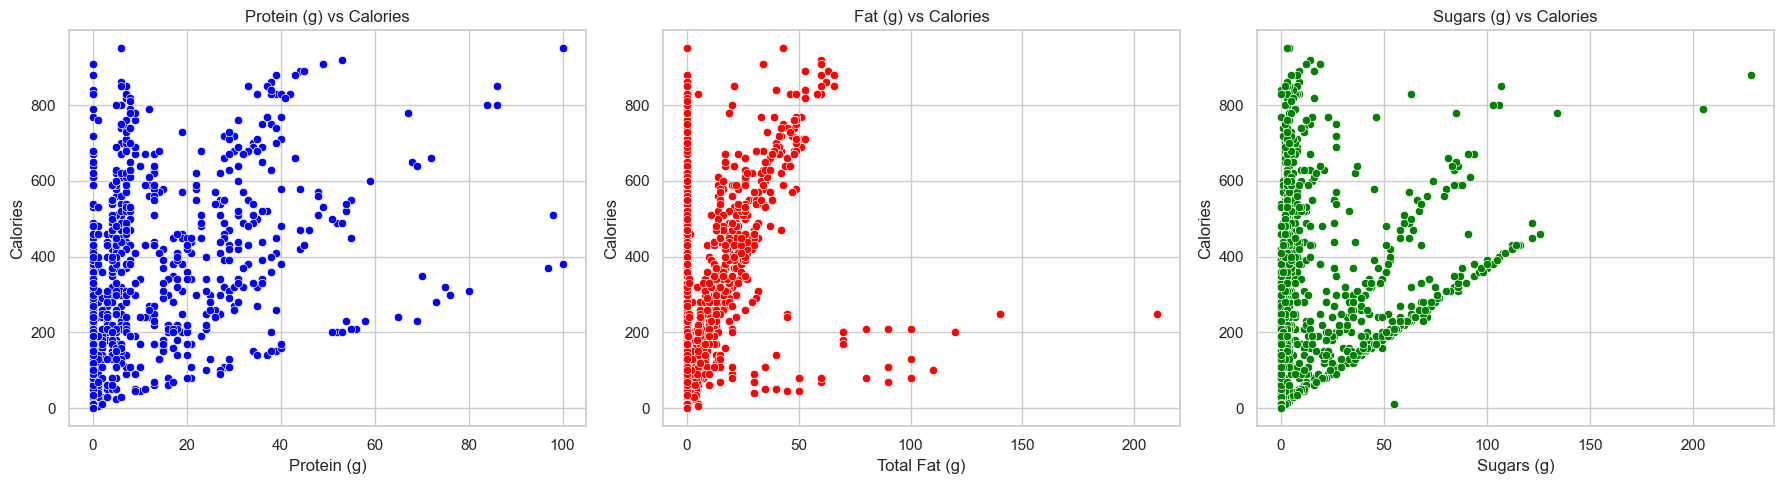

Correlation between Nutrients and Calories:
               Protein (g)  Total Fat (g)  Sugars (g)  Calories
Protein (g)       1.000000       0.273388    0.175314  0.436988
Total Fat (g)     0.273388       1.000000   -0.169689  0.388288
Sugars (g)        0.175314      -0.169689    1.000000  0.158827
Calories          0.436988       0.388288    0.158827  1.000000


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, ensure that the necessary columns are correctly formatted as numeric values
# We'll handle any non-numeric values by converting them into NaN (Not a Number) where appropriate
merged_df['Protein (g)'] = pd.to_numeric(merged_df['Protein (g)'], errors='coerce')
merged_df['Total Fat (g)'] = pd.to_numeric(merged_df['Total Fat (g)'], errors='coerce')
merged_df['Sugars (g)'] = pd.to_numeric(merged_df['Sugars (g)'], errors='coerce')
merged_df['Calories'] = pd.to_numeric(merged_df['Calories'], errors='coerce')

# Now visualize how Protein, Fat, and Sugar relate to Calories through scatter plots
sns.set(style="whitegrid")

# Create a figure with 3 subplots, one for each comparison: Protein vs Calories, Fat vs Calories, and Sugar vs Calories
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for Protein vs Calories
sns.scatterplot(x='Protein (g)', y='Calories', data=merged_df, ax=axes[0], color='blue')
axes[0].set_title("Protein (g) vs Calories")
axes[0].set_xlabel("Protein (g)")
axes[0].set_ylabel("Calories")

# Scatter plot for Fat vs Calories
sns.scatterplot(x='Total Fat (g)', y='Calories', data=merged_df, ax=axes[1], color='red')
axes[1].set_title("Fat (g) vs Calories")
axes[1].set_xlabel("Total Fat (g)")
axes[1].set_ylabel("Calories")

# Scatter plot for Sugar vs Calories
sns.scatterplot(x='Sugars (g)', y='Calories', data=merged_df, ax=axes[2], color='green')
axes[2].set_title("Sugars (g) vs Calories")
axes[2].set_xlabel("Sugars (g)")
axes[2].set_ylabel("Calories")

# Adjust the layout so that the plots don't overlap
plt.tight_layout()
plt.show()

# Finally, calculate and display the correlation between Protein, Fat, Sugar, and Calories
correlation = merged_df[['Protein (g)', 'Total Fat (g)', 'Sugars (g)', 'Calories']].corr()
print("Correlation between Nutrients and Calories:")
print(correlation)


Calculating outliers that are physically impossible

Number of significant outliers detected: 146
      Protein (g)  Total Fat (g)  Sugars (g)  Calories  \
152             0            0.0        86.0     310.0   
153             0            0.0        53.0     190.0   
373             0            0.0        47.0     170.0   
440             0            0.0        55.0      10.0   
442             0            0.0        71.0     240.0   
...           ...            ...         ...       ...   
1102           35            0.0        35.0     140.0   
1106           17            0.0        17.0      70.0   
1107           40            0.0        40.0     170.0   
1108           29            0.0        29.0     130.0   
1109           24            0.0        24.0     100.0   

      Calculated Total Calories  Percentage Difference  
152                       344.0               0.109677  
153                       212.0               0.115789  
373                       188.0               0.105882  
440                       220.

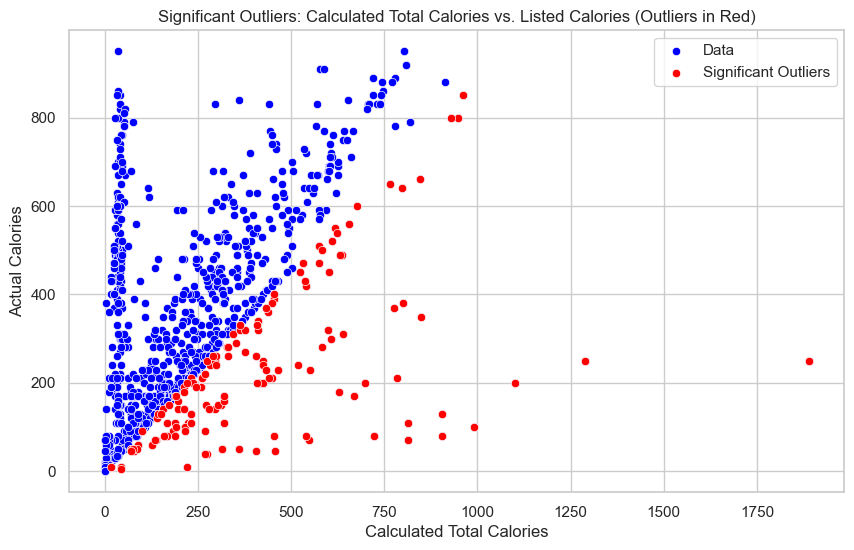

In [43]:
# Calculate the expected calories from Protein, Fat, and Sugar
merged_df['Protein Calories'] = merged_df['Protein (g)'] * 4
merged_df['Fat Calories'] = merged_df['Total Fat (g)'] * 9
merged_df['Sugar Calories'] = merged_df['Sugars (g)'] * 4

# Calculate the total expected calories from Protein, Fat, and Sugar
merged_df['Calculated Total Calories'] = (
    merged_df['Protein Calories'] +
    merged_df['Fat Calories'] +
    merged_df['Sugar Calories']
)

# Define a significant threshold (e.g., 10% difference between calculated and actual calories)
threshold = 0.10  # 10% difference

# Calculate the percentage difference between calculated and actual calories
merged_df['Calorie Difference'] = merged_df['Calculated Total Calories'] - merged_df['Calories']
merged_df['Percentage Difference'] = merged_df['Calorie Difference'] / merged_df['Calories']

# Identify the rows where the percentage difference is greater than the threshold (significant outliers)
significant_outliers = merged_df[merged_df['Percentage Difference'] > threshold]

# Print the number of significant outliers detected
print(f"Number of significant outliers detected: {len(significant_outliers)}")

# Optionally, print the significant outliers for review
print(significant_outliers[['Protein (g)', 'Total Fat (g)', 'Sugars (g)', 'Calories', 'Calculated Total Calories', 'Percentage Difference']])

# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot to show the relationship between the calculated and actual calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Calculated Total Calories'], y=merged_df['Calories'], color='blue', label='Data')
sns.scatterplot(x=significant_outliers['Calculated Total Calories'], y=significant_outliers['Calories'], color='red', label='Significant Outliers')

plt.title("Significant Outliers: Calculated Total Calories vs. Listed Calories (Outliers in Red)")
plt.xlabel("Calculated Total Calories")
plt.ylabel("Actual Calories")
plt.legend()
plt.show()


Calculating percentage of entries that are outliers / physically impossible

In [44]:
# Calculate the percentage of outliers in the dataset
total_entries = len(merged_df)
outlier_entries = len(significant_outliers)
outlier_percentage = (outlier_entries / total_entries) * 100

# Print the percentage of outliers
print(f"Percentage of entries that are significant outliers: {outlier_percentage:.2f}%")


Percentage of entries that are significant outliers: 13.53%
